In [1]:
!pip install pyspark


In [2]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("EDA with Spark") \
    .getOrCreate()


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avirit","key":"b549c69a566295f2f25b24ef7f1f1f9b"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset


Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): MIT
fashion-product-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip fashion-product-images-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating: fashion

In [8]:
!ls


fashion-dataset  fashion-product-images-dataset.zip  sample_data


In [9]:
!ls fashion-dataset


fashion-dataset  images  images.csv  styles  styles.csv


In [10]:
# check if spark session is running
print(spark)


In [11]:
images_df = spark.read.csv('fashion-dataset/images.csv', header=True, inferSchema=True)
images_df.show(5)  # Show the first 5 rows


+---------+--------------------+
| filename|                link|
+---------+--------------------+
|15970.jpg|http://assets.myn...|
|39386.jpg|http://assets.myn...|
|59263.jpg|http://assets.myn...|
|21379.jpg|http://assets.myn...|
|53759.jpg|http://assets.myn...|
+---------+--------------------+
only showing top 5 rows



In [12]:
styles_df = spark.read.csv('fashion-dataset/styles.csv', header=True, inferSchema=True)
styles_df.show(5)  # Show the first 5 rows


+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|   id|gender|masterCategory|subCategory|articleType|baseColour|season|year| usage|  productDisplayName|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|15970|   Men|       Apparel|    Topwear|     Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|
|39386|   Men|       Apparel| Bottomwear|      Jeans|      Blue|Summer|2012|Casual|Peter England Men...|
|59263| Women|   Accessories|    Watches|    Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|
|21379|   Men|       Apparel| Bottomwear|Track Pants|     Black|  Fall|2011|Casual|Manchester United...|
|53759|   Men|       Apparel|    Topwear|    Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
only showing top 5 rows



In [13]:
from PIL import Image
import os

# List to store image metadata
image_data = []

# Iterate over each file in the images folder
image_folder = 'fashion-dataset/images'
for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg'):
        # Open the image file
        with Image.open(os.path.join(image_folder, image_file)) as img:
            # Get image metadata
            image_data.append({
                'filename': image_file,
                'format': img.format,
                'size': img.size,
                'mode': img.mode
            })

# Convert to Spark DataFrame
image_df = spark.createDataFrame(image_data)
image_df.show(5)


+---------+------+----+------------+
| filename|format|mode|        size|
+---------+------+----+------------+
|25712.jpg|  JPEG| RGB|{1800, 2400}|
|45121.jpg|  JPEG| RGB|{1080, 1440}|
|55368.jpg|  JPEG| RGB|{1080, 1440}|
|16509.jpg|  JPEG| RGB|{1800, 2400}|
|16048.jpg|  JPEG| RGB|{1800, 2400}|
+---------+------+----+------------+
only showing top 5 rows



In [14]:
import os

# List all files in the images folder
image_folder = 'fashion-dataset/styles'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.json')]
print(f"Found {len(image_files)} json files in the images folder.")


Found 44446 json files in the images folder.


In [15]:
# read 1st json file
import json
import os

# Load one JSON file to inspect the structure
styles_folder = 'fashion-dataset/styles'
example_file = os.path.join(styles_folder, os.listdir(styles_folder)[0])

with open(example_file) as f:
    data = json.load(f)
    print(json.dumps(data, indent=4))  # Pretty-print JSON structure


{
    "notification": {},
    "meta": {
        "code": 200,
        "requestId": "ab9f0c7a-b655-4bde-9712-4d2584735161"
    },
    "data": {
        "id": 30138,
        "price": 499,
        "discountedPrice": 499,
        "styleType": "P",
        "productTypeId": 289,
        "articleNumber": "FMTS5790",
        "visualTag": "",
        "productDisplayName": "Flying Machine Women Printed Pink T-shirt",
        "variantName": "Printed",
        "myntraRating": 1,
        "catalogAddDate": 1452002942,
        "brandName": "Flying Machine",
        "ageGroup": "Adults-Women",
        "gender": "Women",
        "baseColour": "Pink",
        "colour1": "NA",
        "colour2": "NA",
        "fashionType": "Fashion",
        "season": "Summer",
        "year": "2012",
        "usage": "Casual",
        "vat": 5.5,
        "displayCategories": "Casual Wear",
        "weight": "0",
        "navigationId": 419,
        "landingPageUrl": "Tshirts/Flying-Machine/Flying-Machine-Women-Printed-P

styles.csv file

In [16]:
# Display the schema of the DataFrame
styles_df.printSchema()

# Count the number of rows
num_rows = styles_df.count()
print(f"Number of rows: {num_rows}")


root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- masterCategory: string (nullable = true)
 |-- subCategory: string (nullable = true)
 |-- articleType: string (nullable = true)
 |-- baseColour: string (nullable = true)
 |-- season: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- usage: string (nullable = true)
 |-- productDisplayName: string (nullable = true)

Number of rows: 44446


In [17]:
styles_df.describe().show()


+-------+------------------+------+--------------+-----------+------------------+----------+------+------------------+------+--------------------+
|summary|                id|gender|masterCategory|subCategory|       articleType|baseColour|season|              year| usage|  productDisplayName|
+-------+------------------+------+--------------+-----------+------------------+----------+------+------------------+------+--------------------+
|  count|             44446| 44446|         44446|      44446|             44446|     44446| 44425|             44445| 44445|               44446|
|   mean|29692.631350402735|  NULL|          NULL|       NULL|              NULL|      NULL|  NULL|2012.8059399257509|  NULL|                NULL|
| stddev|17048.234981940943|  NULL|          NULL|       NULL|              NULL|      NULL|  NULL| 2.126401404408455|  NULL|                NULL|
|    min|              1163|  Boys|   Accessories|Accessories|Accessory Gift Set|     Beige|  Fall|              2007|

In [18]:
from pyspark.sql.functions import col

# List of categorical columns
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

# Count distinct values in each categorical column
for column in categorical_columns:
    distinct_count = styles_df.select(column).distinct().count()
    print(f"Number of unique values in '{column}': {distinct_count}")


Number of unique values in 'gender': 5
Number of unique values in 'masterCategory': 7
Number of unique values in 'subCategory': 45
Number of unique values in 'articleType': 143
Number of unique values in 'baseColour': 47
Number of unique values in 'season': 5
Number of unique values in 'usage': 10


In [19]:
from pyspark.sql.functions import count

# Show top 5 most common values for each categorical column
for column in categorical_columns:
    print(f"Most common values in '{column}':")
    styles_df.groupBy(column).count().orderBy(col("count").desc()).show(5)


Most common values in 'gender':
+------+-----+
|gender|count|
+------+-----+
|   Men|22165|
| Women|18632|
|Unisex| 2164|
|  Boys|  830|
| Girls|  655|
+------+-----+

Most common values in 'masterCategory':
+--------------+-----+
|masterCategory|count|
+--------------+-----+
|       Apparel|21400|
|   Accessories|11289|
|      Footwear| 9222|
| Personal Care| 2404|
|    Free Items|  105|
+--------------+-----+
only showing top 5 rows

Most common values in 'subCategory':
+-----------+-----+
|subCategory|count|
+-----------+-----+
|    Topwear|15405|
|      Shoes| 7344|
|       Bags| 3055|
| Bottomwear| 2694|
|    Watches| 2542|
+-----------+-----+
only showing top 5 rows

Most common values in 'articleType':
+------------+-----+
| articleType|count|
+------------+-----+
|     Tshirts| 7070|
|      Shirts| 3217|
|Casual Shoes| 2846|
|     Watches| 2542|
|Sports Shoes| 2036|
+------------+-----+
only showing top 5 rows

Most common values in 'baseColour':
+----------+-----+
|baseColour|

In [20]:
styles_df.groupBy("masterCategory").count().orderBy(col("count").desc()).show()


+--------------+-----+
|masterCategory|count|
+--------------+-----+
|       Apparel|21400|
|   Accessories|11289|
|      Footwear| 9222|
| Personal Care| 2404|
|    Free Items|  105|
|Sporting Goods|   25|
|          Home|    1|
+--------------+-----+



In [21]:
# Distribution by season
styles_df.groupBy("season").count().orderBy(col("count").desc()).show()

# Distribution by year
styles_df.groupBy("year").count().orderBy(col("year")).show()


+------+-----+
|season|count|
+------+-----+
|Summer|21476|
|  Fall|11445|
|Winter| 8519|
|Spring| 2985|
|  NULL|   21|
+------+-----+

+----+-----+
|year|count|
+----+-----+
|NULL|    1|
|2007|    2|
|2008|    7|
|2009|   20|
|2010|  846|
|2011|13689|
|2012|16290|
|2013| 1213|
|2014|  236|
|2015| 2780|
|2016| 6007|
|2017| 2917|
|2018|  405|
|2019|   33|
+----+-----+



In [22]:
from pyspark.sql.functions import isnan, when

# Count null values in each column
styles_df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in styles_df.columns]).show()


+---+------+--------------+-----------+-----------+----------+------+----+-----+------------------+
| id|gender|masterCategory|subCategory|articleType|baseColour|season|year|usage|productDisplayName|
+---+------+--------------+-----------+-----------+----------+------+----+-----+------------------+
|  0|     0|             0|          0|          0|         0|    21|   1|    1|                 0|
+---+------+--------------+-----------+-----------+----------+------+----+-----+------------------+



In [23]:
styles_df.groupBy("usage").count().orderBy(col("count").desc()).show()


+------------+-----+
|       usage|count|
+------------+-----+
|      Casual|34414|
|      Sports| 4025|
|      Ethnic| 3208|
|      Formal| 2359|
|          NA|  316|
|Smart Casual|   67|
|       Party|   29|
|      Travel|   26|
|        Home|    1|
|        NULL|    1|
+------------+-----+



In [24]:
styles_df.groupBy("gender", "articleType").count().orderBy(col("count").desc()).show(10)


+------+------------+-----+
|gender| articleType|count|
+------+------------+-----+
|   Men|     Tshirts| 5246|
|   Men|      Shirts| 2844|
|   Men|Casual Shoes| 2247|
| Women|      Kurtas| 1761|
| Women|    Handbags| 1689|
|   Men|Sports Shoes| 1590|
| Women|        Tops| 1532|
|   Men|     Watches| 1473|
| Women|       Heels| 1322|
| Women|     Tshirts| 1116|
+------+------------+-----+
only showing top 10 rows



In [25]:
styles_df.groupBy("baseColour").count().orderBy(col("count").desc()).show(10)


+----------+-----+
|baseColour|count|
+----------+-----+
|     Black| 9732|
|     White| 5540|
|      Blue| 4922|
|     Brown| 3494|
|      Grey| 2741|
|       Red| 2458|
|     Green| 2116|
|      Pink| 1861|
| Navy Blue| 1791|
|    Purple| 1643|
+----------+-----+
only showing top 10 rows



In [26]:
from pyspark.sql import SparkSession
from pyspark.sql.types import (
    StructType, StructField, StringType, IntegerType, BooleanType, FloatType, ArrayType, MapType
)

# Initialize Spark Session
#spark = SparkSession.builder \
 #   .appName("JSON to DataFrame") \
  #  .getOrCreate()

# Define the schema (same as in your original code)
image_resolutions_schema = StructType([
    StructField("X1080X1440Xmini", StringType(), True),
    StructField("X48X64", StringType(), True),
    StructField("X1080X1440", StringType(), True),
    StructField("X150X200", StringType(), True),
    StructField("X360X480", StringType(), True),
    StructField("X180X240", StringType(), True),
    StructField("X360X480Xmini", StringType(), True),
    StructField("X180X240Xmini", StringType(), True),
    StructField("X150X200Xmini", StringType(), True),
    StructField("X48X64Xmini", StringType(), True),
    StructField("X125X161", StringType(), True),
    StructField("X125X161Xmini", StringType(), True)
])

style_images_schema = StructType([
    StructField("imageURL", StringType(), True),
    StructField("resolutions", image_resolutions_schema, True),
    StructField("imageType", StringType(), True)
])

article_attributes_schema = StructType([
    StructField("Pattern", StringType(), True),
    StructField("Body_or_Garment_Size", StringType(), True)
])

cross_link_schema = StructType([
    StructField("key", StringType(), True),
    StructField("value", StringType(), True)
])

data_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("price", IntegerType(), True),
    StructField("discountedPrice", IntegerType(), True),
    StructField("styleType", StringType(), True),
    StructField("productTypeId", IntegerType(), True),
    StructField("articleNumber", StringType(), True),
    StructField("visualTag", StringType(), True),
    StructField("productDisplayName", StringType(), True),
    StructField("variantName", StringType(), True),
    StructField("myntraRating", IntegerType(), True),
    StructField("catalogAddDate", IntegerType(), True),
    StructField("brandName", StringType(), True),
    StructField("ageGroup", StringType(), True),
    StructField("gender", StringType(), True),
    StructField("baseColour", StringType(), True),
    StructField("colour1", StringType(), True),
    StructField("colour2", StringType(), True),
    StructField("fashionType", StringType(), True),
    StructField("season", StringType(), True),
    StructField("year", StringType(), True),
    StructField("usage", StringType(), True),
    StructField("vat", FloatType(), True),
    StructField("displayCategories", StringType(), True),
    StructField("weight", StringType(), True),
    StructField("navigationId", IntegerType(), True),
    StructField("landingPageUrl", StringType(), True),
    StructField("articleAttributes", article_attributes_schema, True),
    StructField("crossLinks", ArrayType(cross_link_schema), True),
    StructField("brandUserProfile", StringType(), True),  # Empty object
    StructField("codEnabled", BooleanType(), True),
    StructField("styleImages", MapType(StringType(), style_images_schema), True)
])

meta_schema = StructType([
    StructField("code", IntegerType(), True),
    StructField("requestId", StringType(), True)
])

schema = StructType([
    StructField("notification", StringType(), True),  # Empty object
    StructField("meta", meta_schema, True),
    StructField("data", data_schema, True)
])

# Path to the directory containing your JSON files
json_files_path = 'fashion-dataset/styles/*.json'

# Read multiple JSON files into DataFrame with schema
df = spark.read.schema(schema).json(json_files_path)

# Show DataFrame and schema
df.show(truncate=False)
df.printSchema()

+------------+-------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
from pyspark.sql.functions import col

# Flatten the meta and data structs
flattened_df = df.select(
    col("notification"),
    col("meta.code").alias("meta_code"),
    col("meta.requestId").alias("meta_requestId"),
    col("data.id").alias("data_id"),
    col("data.price").alias("data_price"),
    col("data.discountedPrice").alias("data_discountedPrice"),
    col("data.styleType").alias("data_styleType"),
    col("data.productTypeId").alias("data_productTypeId"),
    col("data.articleNumber").alias("data_articleNumber"),
    col("data.visualTag").alias("data_visualTag"),
    col("data.productDisplayName").alias("data_productDisplayName"),
    col("data.variantName").alias("data_variantName"),
    col("data.myntraRating").alias("data_myntraRating"),
    col("data.catalogAddDate").alias("data_catalogAddDate"),
    col("data.brandName").alias("data_brandName"),
    col("data.ageGroup").alias("data_ageGroup"),
    col("data.gender").alias("data_gender"),
    col("data.baseColour").alias("data_baseColour"),
    col("data.colour1").alias("data_colour1"),
    col("data.colour2").alias("data_colour2"),
    col("data.fashionType").alias("data_fashionType"),
    col("data.season").alias("data_season"),
    col("data.year").alias("data_year"),
    col("data.usage").alias("data_usage"),
    col("data.vat").alias("data_vat"),
    col("data.displayCategories").alias("data_displayCategories"),
    col("data.weight").alias("data_weight"),
    col("data.navigationId").alias("data_navigationId"),
    col("data.landingPageUrl").alias("data_landingPageUrl"),
    col("data.articleAttributes.Pattern").alias("data_articleAttributes_Pattern"),
    col("data.articleAttributes.Body_or_Garment_Size").alias("data_articleAttributes_Body_or_Garment_Size"),
    col("data.crossLinks").alias("data_crossLinks"),
    col("data.brandUserProfile").alias("data_brandUserProfile"),
    col("data.codEnabled").alias("data_codEnabled"),
    col("data.styleImages").alias("data_styleImages")
)

# Show the flattened DataFrame
flattened_df.show(truncate=False)

+------------+---------+------------------------------------+-------+----------+--------------------+--------------+------------------+-----------------------------+-------------------+---------------------------------------------+-----------------------------------+-----------------+-------------------+-------------------------+-------------+-----------+---------------+------------+------------+----------------+-----------+---------+----------+--------+-----------------------+-----------+-----------------+------------------------------------------------------------------------------------------+------------------------------+-------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------

In [28]:
from pyspark.sql.functions import explode

crosslinks_df = flattened_df.withColumn("crossLink_key", explode(col("data_crossLinks.key"))) \
                            .withColumn("crossLink_value", explode(col("data_crossLinks.value")))

crosslinks_df.show(truncate=False)

+------------+---------+------------------------------------+-------+----------+--------------------+--------------+------------------+---------------------+--------------+-----------------------------------------+--------------------+-----------------+-------------------+-------------------+-------------+-----------+---------------+------------+------------+----------------+-----------+---------+----------+--------+----------------------+-----------+-----------------+-----------------------------------------------------------------------------------+------------------------------+-------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [29]:
flattened_df.filter(flattened_df.data_gender == "Men").show(truncate=False)


+------------+---------+------------------------------------+-------+----------+--------------------+--------------+------------------+--------------------+-------------------+-------------------------------------------------------+---------------------------------------+-----------------+-------------------+-------------------------+-------------+-----------+---------------+------------+------------+----------------+-----------+---------+----------+--------+----------------------+-----------+-----------------+---------------------------------------------------------------------------------------------+------------------------------+-------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------

In [30]:
from pyspark.sql.functions import explode
exploded_df = flattened_df.select(flattened_df.data_id, explode(flattened_df.data_crossLinks))
exploded_df.show()


+-------+--------------------+
|data_id|                 col|
+-------+--------------------+
|  18481|{More Casual Shoe...|
|  18481|{More Blue Casual...|
|  18481|{More Casual Shoe...|
|  43465|{More Night suits...|
|  43465|{More Pink Night ...|
|  43465|{More Night suits...|
|  22480|{More Tshirts by ...|
|  22480|{More Navy Blue T...|
|  22480|{More Tshirts, ts...|
|   9150|{More Jeans by Le...|
|   9150|{More Black Jeans...|
|   9150|{More Jeans, jean...|
|   9143|{More Jeans by Le...|
|   9143|{More Blue Jeans,...|
|   9143|{More Jeans, jean...|
|  42349|{More Leggings by...|
|  42349|{More Red Legging...|
|  42349|{More Leggings, l...|
|  52080|{More Tshirts by ...|
|  52080|{More Navy Blue T...|
+-------+--------------------+
only showing top 20 rows



<Axes: title={'center': 'Top 5 Brands by Average Price'}, xlabel='Brand', ylabel='Average Price'>

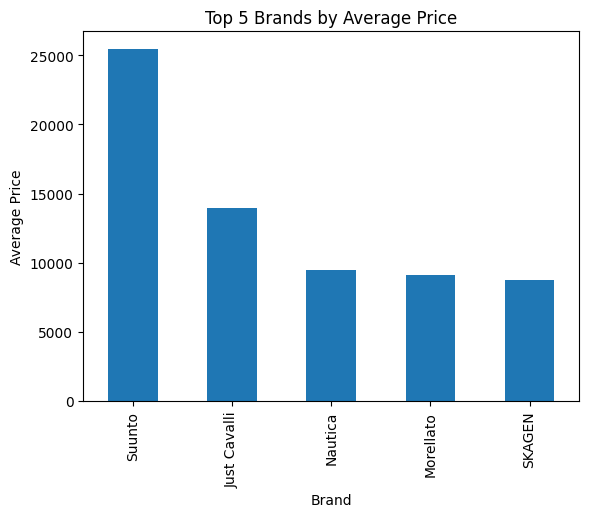

In [31]:
# Convert to Pandas DataFrame
pandas_df = flattened_df.toPandas()

# Group by brand name and calculate average price
top_brands = (
    pandas_df.groupby("data_brandName")["data_price"]
    .mean()
    .sort_values(ascending=False)
    .head(5)  # Get top 5 brands
)

# Plot the top 5 brands
top_brands.plot(kind="bar", title="Top 5 Brands by Average Price", xlabel="Brand", ylabel="Average Price")


In [32]:
# Drop unnecessary columns
cleaned_df = flattened_df.drop(
    "data_articleAttributes_Pattern",
    "data_articleAttributes_Body_or_Garment_Size","data_visualTag",
    "data_brandUserProfile","notification",
    "data_styleImages" ,
    "data_styleImages"
)

# Show the updated DataFrame
cleaned_df.show(truncate=False)


+---------+------------------------------------+-------+----------+--------------------+--------------+------------------+-----------------------------+---------------------------------------------+-----------------------------------+-----------------+-------------------+-------------------------+-------------+-----------+---------------+------------+------------+----------------+-----------+---------+----------+--------+-----------------------+-----------+-----------------+------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+
|meta_code|meta_requestId                      |data_id|data_price|data_discountedPrice|data_styleType|data_productTypeId|data_articleNumber           |data_productDisplayName           

In [33]:
trends_df = cleaned_df.groupBy("data_season", "data_year", "data_baseColour").count()
trends_df.show()


+-----------+---------+---------------+-----+
|data_season|data_year|data_baseColour|count|
+-----------+---------+---------------+-----+
|       Fall|     2012|      Navy Blue|   64|
|     Winter|     2017|          Black|    3|
|     Summer|     2012|      Navy Blue|  586|
|     Summer|     2012|         Purple|  474|
|       Fall|     2018|          White|    3|
|       Fall|     2011|           Blue| 1338|
|       Fall|     2011|          White| 1148|
|       Fall|     2011|           Grey|  760|
|       Fall|     2012|       Charcoal|    3|
|     Summer|     2017|      Navy Blue|    9|
|     Summer|     2013|          Black|  163|
|     Summer|     2015|            Red|   21|
|     Winter|     2012|           Blue|   73|
|     Winter|     2015|          Black|  553|
|     Winter|     2012|   Coffee Brown|    3|
|     Winter|     2011|         Yellow|    3|
|     Spring|     2013|            Red|   14|
|     Winter|     2012|          Brown|  168|
|     Spring|     2013|          B

In [34]:
pricing_df = cleaned_df.groupBy("data_brandName").agg(
    {"data_price": "avg", "data_discountedPrice": "avg"}
).withColumnRenamed("avg(data_price)", "avg_price") \
 .withColumnRenamed("avg(data_discountedPrice)", "avg_discountedPrice")
pricing_df.show()


+--------------------+-------------------+------------------+
|      data_brandName|avg_discountedPrice|         avg_price|
+--------------------+-------------------+------------------+
|          Timberland|           4069.636|          4069.636|
|                Nike|  2686.343622333182| 2686.343622333182|
|              Myntra|  473.3613445378151| 473.3697478991597|
|United Colors of ...|  1713.685860524632| 1820.811260396673|
|              ADIDAS|  2056.758710348414| 2056.758710348414|
|      Flying Machine|  962.4897959183673| 1126.189504373178|
|         John Miller| 1055.3318777292577|1055.3318777292577|
|              Jockey| 281.88442211055275|281.88442211055275|
|                Puma|  2106.551477597712|2132.1711153479505|
|          Numero Uno| 1384.8108108108108|1384.8108108108108|
|               Crocs|  1454.923076923077|1727.3692307692309|
|        Calvin Klein|            3049.65|           3049.65|
|            Converse| 1376.1666666666667|1380.5344827586207|
|       

In [35]:
from pyspark.sql.functions import explode

exploded_links = cleaned_df.select("data_id", explode("data_crossLinks"))
exploded_links.show()


+-------+--------------------+
|data_id|                 col|
+-------+--------------------+
|  18481|{More Casual Shoe...|
|  18481|{More Blue Casual...|
|  18481|{More Casual Shoe...|
|  43465|{More Night suits...|
|  43465|{More Pink Night ...|
|  43465|{More Night suits...|
|  22480|{More Tshirts by ...|
|  22480|{More Navy Blue T...|
|  22480|{More Tshirts, ts...|
|   9150|{More Jeans by Le...|
|   9150|{More Black Jeans...|
|   9150|{More Jeans, jean...|
|   9143|{More Jeans by Le...|
|   9143|{More Blue Jeans,...|
|   9143|{More Jeans, jean...|
|  42349|{More Leggings by...|
|  42349|{More Red Legging...|
|  42349|{More Leggings, l...|
|  52080|{More Tshirts by ...|
|  52080|{More Navy Blue T...|
+-------+--------------------+
only showing top 20 rows



In [36]:
training_data = cleaned_df.select("data_id", "data_productTypeId", "data_price").dropna()


In [37]:
training_data = training_data.filter(
    (training_data.data_id.isNotNull()) &
    (training_data.data_productTypeId.isNotNull()) &
    (training_data.data_price.isNotNull())
)


In [38]:
train_data, test_data = training_data.randomSplit([0.8, 0.2], seed=42)


In [39]:
from pyspark.ml.recommendation import ALS

# Initialize ALS
als = ALS(
    userCol="data_id",
    itemCol="data_productTypeId",
    ratingCol="data_price",
    nonnegative=True,
    implicitPrefs=False,
    coldStartStrategy="drop"
)

# Fit the model on training data
model = als.fit(train_data)


In [40]:
# Check user overlap
train_users = train_data.select("data_id").distinct()
test_users = test_data.select("data_id").distinct()
common_users = train_users.intersect(test_users)
print(f"Number of common users: {common_users.count()}")

# Check item overlap
train_items = train_data.select("data_productTypeId").distinct()
test_items = test_data.select("data_productTypeId").distinct()
common_items = train_items.intersect(test_items)
print(f"Number of common items: {common_items.count()}")


Number of common users: 0
Number of common items: 140


In [41]:
# Get a list of unique users
unique_users = training_data.select("data_id").distinct()

# Sample users for the test set
test_users = unique_users.sample(fraction=0.2, seed=42)

# Filter training and test datasets based on these users
test_data = training_data.join(test_users, on="data_id")
train_data = training_data.subtract(test_data)

# Verify overlap again
common_users = train_data.select("data_id").distinct().intersect(test_data.select("data_id").distinct())
print(f"Number of common users after split: {common_users.count()}")


Number of common users after split: 0


In [42]:
from pyspark.sql.functions import col

# Cast data_year to IntegerType
cleaned_df = cleaned_df.withColumn("data_year", col("data_year").cast("int"))


In [43]:
cleaned_df.printSchema()


root
 |-- meta_code: integer (nullable = true)
 |-- meta_requestId: string (nullable = true)
 |-- data_id: integer (nullable = true)
 |-- data_price: integer (nullable = true)
 |-- data_discountedPrice: integer (nullable = true)
 |-- data_styleType: string (nullable = true)
 |-- data_productTypeId: integer (nullable = true)
 |-- data_articleNumber: string (nullable = true)
 |-- data_productDisplayName: string (nullable = true)
 |-- data_variantName: string (nullable = true)
 |-- data_myntraRating: integer (nullable = true)
 |-- data_catalogAddDate: integer (nullable = true)
 |-- data_brandName: string (nullable = true)
 |-- data_ageGroup: string (nullable = true)
 |-- data_gender: string (nullable = true)
 |-- data_baseColour: string (nullable = true)
 |-- data_colour1: string (nullable = true)
 |-- data_colour2: string (nullable = true)
 |-- data_fashionType: string (nullable = true)
 |-- data_season: string (nullable = true)
 |-- data_year: integer (nullable = true)
 |-- data_usage: 

In [44]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Step 1: Index Categorical Features
indexer = StringIndexer(inputCols=["data_fashionType", "data_brandName", "data_baseColour"],
                        outputCols=["fashionType_index", "brandName_index", "baseColour_index"])

indexed_df = indexer.fit(cleaned_df).transform(cleaned_df)

# Step 2: Assemble Features into a Vector
assembler = VectorAssembler(
    inputCols=["fashionType_index", "brandName_index", "baseColour_index", "data_price", "data_year"],
    outputCol="features"
)

# Create the final DataFrame
final_df = assembler.transform(indexed_df)

# Display the prepared DataFrame
final_df.select("features", "data_price").show(5)


+--------------------+----------+
|            features|data_price|
+--------------------+----------+
|[0.0,1.0,2.0,4999...|      4999|
|[0.0,86.0,7.0,119...|      1199|
|[0.0,47.0,8.0,159...|      1590|
|[0.0,18.0,0.0,209...|      2099|
|[0.0,18.0,2.0,209...|      2099|
+--------------------+----------+
only showing top 5 rows



In [45]:
final_df = final_df.withColumnRenamed("data_price", "label")


In [46]:
from pyspark.sql.functions import col, sum

# Check null counts for the columns used in VectorAssembler
cleaned_df.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in ["data_fashionType", "data_brandName", "data_baseColour", "data_price", "data_year"]]
).show()

# Drop rows where any of the relevant columns are null
cleaned_df = cleaned_df.dropna(subset=["data_fashionType", "data_brandName", "data_baseColour", "data_price", "data_year"])

cleaned_df = cleaned_df.fillna({
    "data_fashionType": "unknown",
    "data_brandName": "unknown",
    "data_baseColour": "unknown",
    "data_price": 0,
    "data_year": 0
})
assembler = VectorAssembler(
    inputCols=["fashionType_index", "brandName_index", "baseColour_index", "data_price", "data_year"],
    outputCol="features",
    handleInvalid="skip"  # Skip rows with nulls
)
assembler = VectorAssembler(
    inputCols=["fashionType_index", "brandName_index", "baseColour_index", "data_price", "data_year"],
    outputCol="features",
    handleInvalid="keep"  # Treat nulls as a separate category
)
final_df = assembler.transform(indexed_df)
final_df.select("features", "data_price").show(5)


+----------------+--------------+---------------+----------+---------+
|data_fashionType|data_brandName|data_baseColour|data_price|data_year|
+----------------+--------------+---------------+----------+---------+
|               0|             0|              0|        20|        1|
+----------------+--------------+---------------+----------+---------+

+--------------------+----------+
|            features|data_price|
+--------------------+----------+
|[0.0,1.0,2.0,4999...|      4999|
|[0.0,86.0,7.0,119...|      1199|
|[0.0,47.0,8.0,159...|      1590|
|[0.0,18.0,0.0,209...|      2099|
|[0.0,18.0,2.0,209...|      2099|
+--------------------+----------+
only showing top 5 rows



In [47]:
# Rename data_price to label
final_df = final_df.withColumnRenamed("data_price", "label")


In [48]:
final_df.printSchema()


root
 |-- meta_code: integer (nullable = true)
 |-- meta_requestId: string (nullable = true)
 |-- data_id: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- data_discountedPrice: integer (nullable = true)
 |-- data_styleType: string (nullable = true)
 |-- data_productTypeId: integer (nullable = true)
 |-- data_articleNumber: string (nullable = true)
 |-- data_productDisplayName: string (nullable = true)
 |-- data_variantName: string (nullable = true)
 |-- data_myntraRating: integer (nullable = true)
 |-- data_catalogAddDate: integer (nullable = true)
 |-- data_brandName: string (nullable = true)
 |-- data_ageGroup: string (nullable = true)
 |-- data_gender: string (nullable = true)
 |-- data_baseColour: string (nullable = true)
 |-- data_colour1: string (nullable = true)
 |-- data_colour2: string (nullable = true)
 |-- data_fashionType: string (nullable = true)
 |-- data_season: string (nullable = true)
 |-- data_year: integer (nullable = true)
 |-- data_usage: strin

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

# Check for null or NaN values in the 'label' column
final_df.select(
    count(when(col("label").isNull(), 1)).alias("null_count"),
    count(when(isnan(col("label")), 1)).alias("nan_count")
).show()
# Drop rows with null or NaN values in the label column
final_df = final_df.filter(col("label").isNotNull() & ~isnan(col("label")))
# Replace null or NaN values with 0
final_df = final_df.fillna({"label": 0})


+----------+---------+
|null_count|nan_count|
+----------+---------+
|        20|        0|
+----------+---------+



In [ ]:
# Drop rows with null label values
final_df = final_df.filter(col("label").isNotNull())

# Verify the null count again
final_df.select(
    count(when(col("label").isNull(), 1)).alias("null_count")
).show()


+----------+
|null_count|
+----------+
|         0|
+----------+



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import udf, col

# Define a UDF to check for NaN or Infinity in feature vectors
def contains_nan_or_inf(vector):
    return any(x != x or x == float('inf') or x == float('-inf') for x in vector.toArray())

contains_nan_or_inf_udf = udf(contains_nan_or_inf, "boolean")

# Filter rows with NaN or Infinity in the features column
problematic_rows = final_df.filter(contains_nan_or_inf_udf(col("features")))

# Show problematic rows
problematic_rows.show(truncate=False)


+---------+------------------------------------+-------+-----+--------------------+--------------+------------------+------------------+--------------------------------------+----------------+-----------------+-------------------+--------------+-------------+-----------+---------------+------------+------------+----------------+-----------+---------+----------+--------+----------------------------+-----------+-----------------+-------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+-----------------+---------------+----------------+------------------------+
|meta_code|meta_requestId                      |data_id|label|data_discountedPrice|data_styleType|data_productTypeId|data_articleNumber|data_productDisplayName               |data_variantName|data_myntraRating|data_catalogAddDate|data_brandName|data_ageGroup|da

In [ ]:
final_df = final_df.filter(~contains_nan_or_inf_udf(col("features")))


In [ ]:
# Check again for problematic rows
problematic_rows = final_df.filter(contains_nan_or_inf_udf(col("features")))
print(f"Number of problematic rows: {problematic_rows.count()}")


Number of problematic rows: 0


In [ ]:
from pyspark.ml.regression import LinearRegression

# Define Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="label")

# Fit the model
lr_model = lr.fit(final_df)

# Predict on the dataset
predictions = lr_model.transform(final_df)

# Show predictions
predictions.select("features", "label", "prediction").show(5)


+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|[0.0,1.0,2.0,4999...| 4999| 4999.000000000001|
|[0.0,86.0,7.0,119...| 1199|1198.9999999999995|
|[0.0,47.0,8.0,159...| 1590|            1590.0|
|[0.0,18.0,0.0,209...| 2099|            2099.0|
|[0.0,18.0,2.0,209...| 2099|            2099.0|
+--------------------+-----+------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Square Error (RMSE): {rmse}")

# Evaluate R²
r2_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)
print(f"R²: {r2}")


Root Mean Square Error (RMSE): 7.843689112267541e-13
R²: 1.0


In [ ]:
# Print coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")


Coefficients: [3.2053991301395993e-13,-2.484566916585295e-15,1.2142262717068698e-14,1.0000000000000004,-3.4828218305035637e-16]
Intercept: 0.0


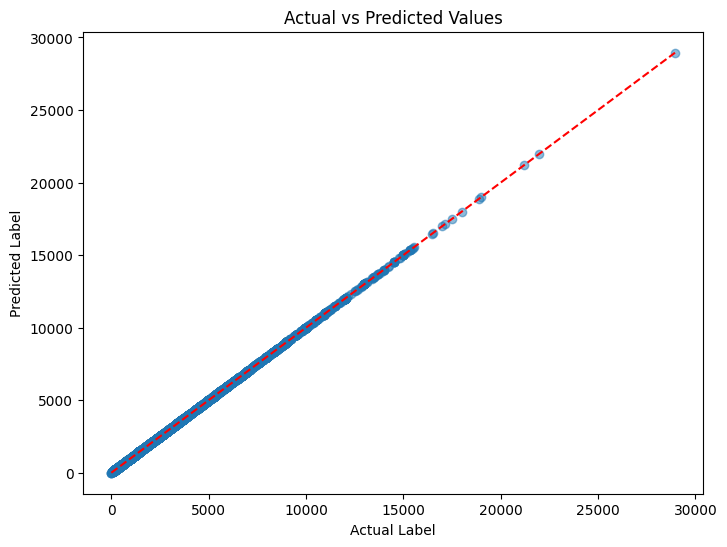

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas DataFrame
pandas_df = predictions.select("label", "prediction").toPandas()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df["label"], pandas_df["prediction"], alpha=0.5)
plt.plot([pandas_df["label"].min(), pandas_df["label"].max()], [pandas_df["label"].min(), pandas_df["label"].max()], 'r--')
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual vs Predicted Values")
plt.show()


In [49]:
# Best-selling categories by gender
final_df.groupBy("data_gender", "data_displayCategories") \
       .count() \
       .orderBy("count", ascending=False) \
       .show(20)


+-----------+----------------------+-----+
|data_gender|data_displayCategories|count|
+-----------+----------------------+-----+
|        Men|           Casual Wear| 4861|
|        Men|              Footwear| 4566|
|      Women|                  NULL| 4458|
|        Men|           Accessories| 4215|
|      Women|           Accessories| 4184|
|      Women|           Casual Wear| 2954|
|      Women|           Ethnic Wear| 1986|
|      Women|              Footwear| 1951|
|     Unisex|           Accessories| 1087|
|        Men|                  NULL| 1011|
|        Men|           Formal Wear|  953|
|        Men|      Casual Wear,Sale|  951|
|        Men|             Innerwear|  833|
|      Women|             Innerwear|  783|
|        Men|           Sports Wear|  708|
|        Men|         Footwear,Sale|  591|
|       Boys|           Casual Wear|  548|
|      Women|      Casual Wear,Sale|  479|
|        Men|  Casual Wear,Winte...|  475|
|      Girls|           Casual Wear|  384|
+----------

Discount Leaders

In [50]:
final_df.printSchema()


root
 |-- meta_code: integer (nullable = true)
 |-- meta_requestId: string (nullable = true)
 |-- data_id: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- data_discountedPrice: integer (nullable = true)
 |-- data_styleType: string (nullable = true)
 |-- data_productTypeId: integer (nullable = true)
 |-- data_articleNumber: string (nullable = true)
 |-- data_productDisplayName: string (nullable = true)
 |-- data_variantName: string (nullable = true)
 |-- data_myntraRating: integer (nullable = true)
 |-- data_catalogAddDate: integer (nullable = true)
 |-- data_brandName: string (nullable = true)
 |-- data_ageGroup: string (nullable = true)
 |-- data_gender: string (nullable = true)
 |-- data_baseColour: string (nullable = true)
 |-- data_colour1: string (nullable = true)
 |-- data_colour2: string (nullable = true)
 |-- data_fashionType: string (nullable = true)
 |-- data_season: string (nullable = true)
 |-- data_year: integer (nullable = true)
 |-- data_usage: strin

In [51]:
# Count products by navigation ID
top_navigation_ids = final_df.groupBy("data_navigationId") \
    .agg(F.count("*").alias("product_count")) \
    .orderBy(F.desc("product_count"))

top_navigation_ids.show(10, truncate=False)


NameError: name 'F' is not defined

In [52]:
from pyspark.sql import functions as F

# Group by gender to find the maximum discounted price for each gender
grouped_df = final_df.groupBy("data_gender") \
    .agg(F.max("data_discountedPrice").alias("max_price"))

# Join the grouped data with the original DataFrame
most_expensive_by_gender = grouped_df.alias("grouped") \
    .join(final_df.alias("original"),
          (F.col("grouped.data_gender") == F.col("original.data_gender")) &
          (F.col("grouped.max_price") == F.col("original.data_discountedPrice")),
          "inner") \
    .select(F.col("original.data_gender").alias("Gender"),
            F.col("original.data_productDisplayName").alias("Product"),
            F.col("grouped.max_price").alias("Price")) \
    .dropDuplicates() \
    .orderBy("Gender", F.desc("Price"))

most_expensive_by_gender.show(truncate=False)


+------+----------------------------------------------------+-----+
|Gender|Product                                             |Price|
+------+----------------------------------------------------+-----+
|Boys  |Timberland Kids Boys Casual Black Casual Shoes      |4290 |
|Boys  |Timberland Kids Boys Brown Casual Shoes             |4290 |
|Boys  |Timberland Kids-Boys Asphlttrl Ek Chk Dk Casual Shoe|4290 |
|Girls |Jealous 21 Girls Black Trousers                     |1799 |
|Men   |Just Cavalli Men Silver Watch                       |21220|
|Unisex|Suunto Vector HR White Watch                        |28950|
|Women |DKNY Women White Dial Chronograph Watch NY4985      |17995|
+------+----------------------------------------------------+-----+



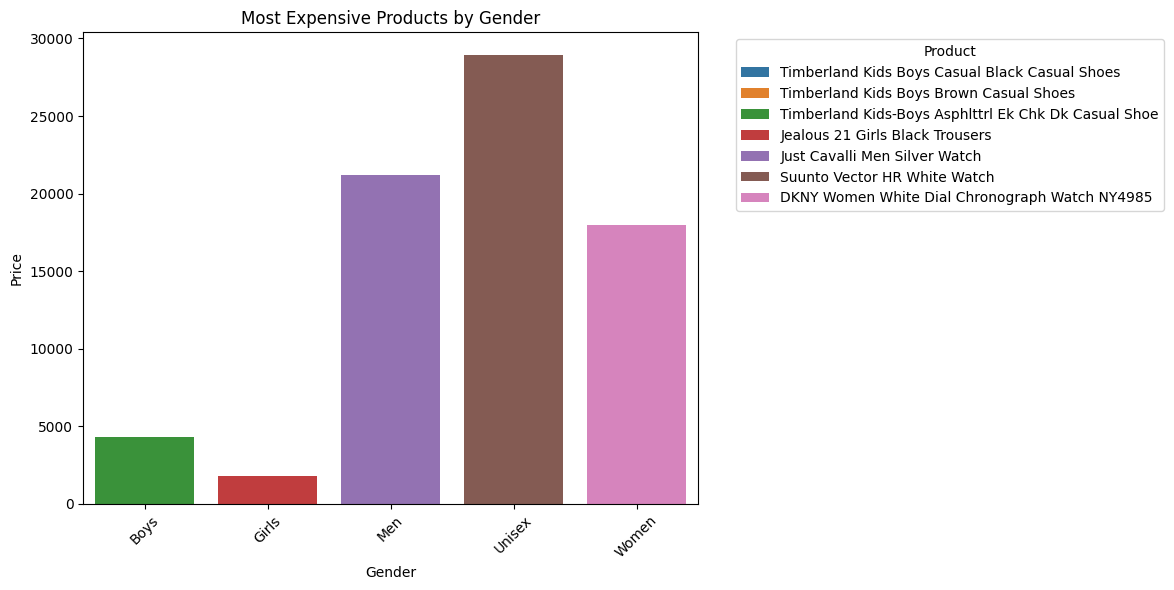

In [ ]:
# Convert to Pandas for visualization
most_expensive_by_gender_pd = most_expensive_by_gender.toPandas()

# Visualization: Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=most_expensive_by_gender_pd,
            x="Gender",
            y="Price",
            hue="Product", dodge=False)
plt.title("Most Expensive Products by Gender")
plt.ylabel("Price")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


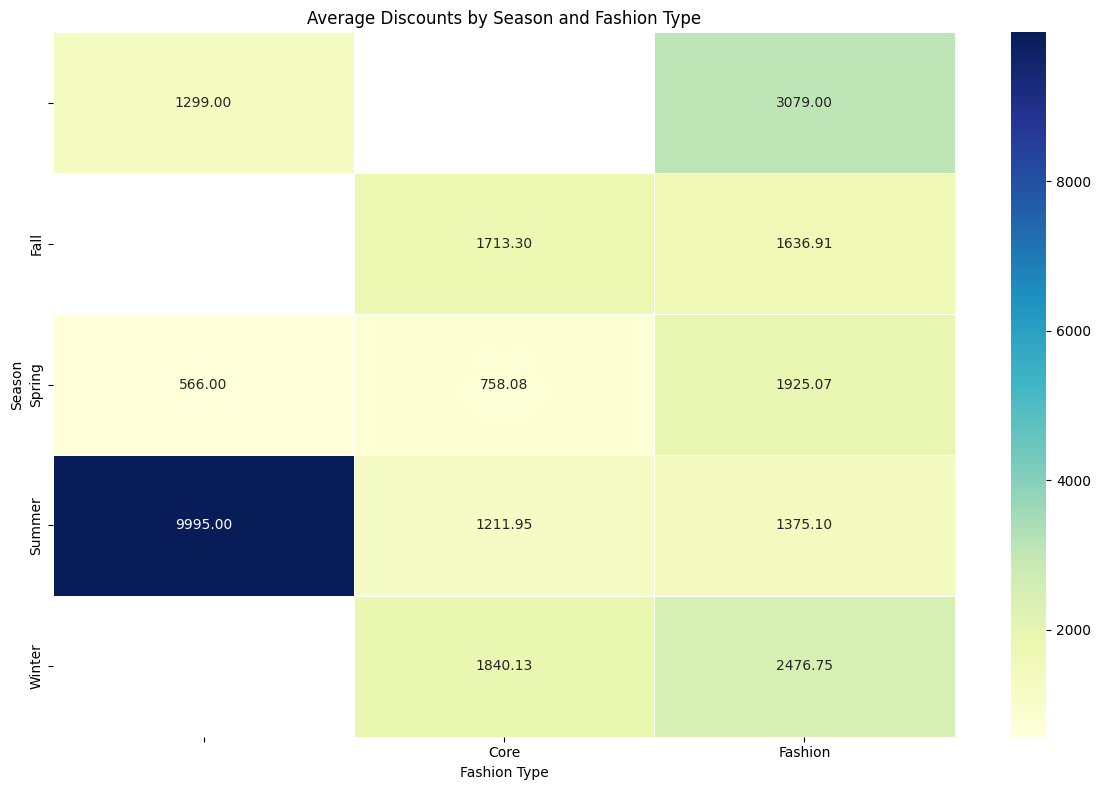

In [54]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average discount by season and fashion type
# Assuming discount = (original price - discounted price)
discount_heatmap = final_df.groupBy("data_season", "data_fashionType") \
    .agg(F.avg(F.col("data_discountedPrice")).alias("avg_discount")) \
    .toPandas()

# Pivot the data for heatmap visualization
heatmap_data = discount_heatmap.pivot(index="data_season", columns="data_fashionType", values="avg_discount")

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Average Discounts by Season and Fashion Type")
plt.ylabel("Season")
plt.xlabel("Fashion Type")
plt.tight_layout()
plt.show()



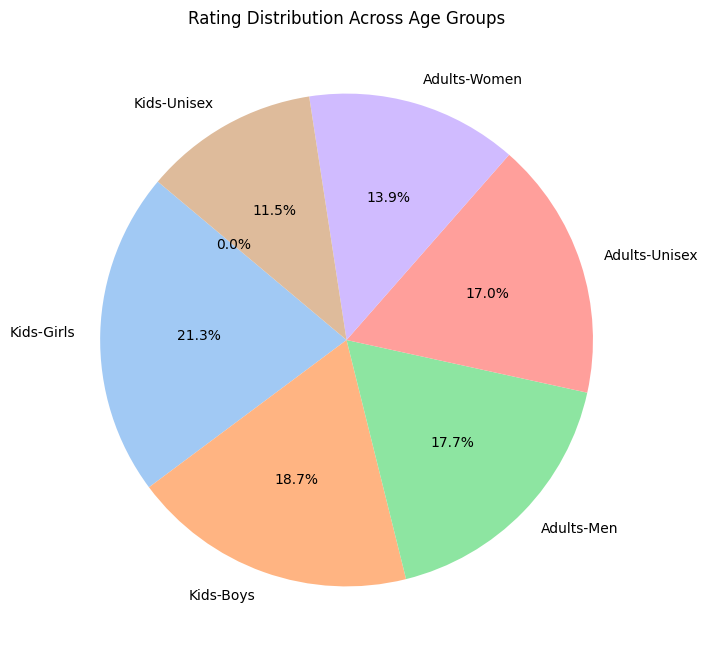

In [56]:
# Calculate average rating by age group
age_group_rating = final_df.groupBy("data_ageGroup") \
    .agg(F.avg("data_myntraRating").alias("avg_rating")) \
    .orderBy(F.desc("avg_rating"))

# Convert to Pandas for visualization
age_group_rating_pd = age_group_rating.toPandas()

# Visualization: Pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_rating_pd["avg_rating"], labels=age_group_rating_pd["data_ageGroup"],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Rating Distribution Across Age Groups")
plt.show()


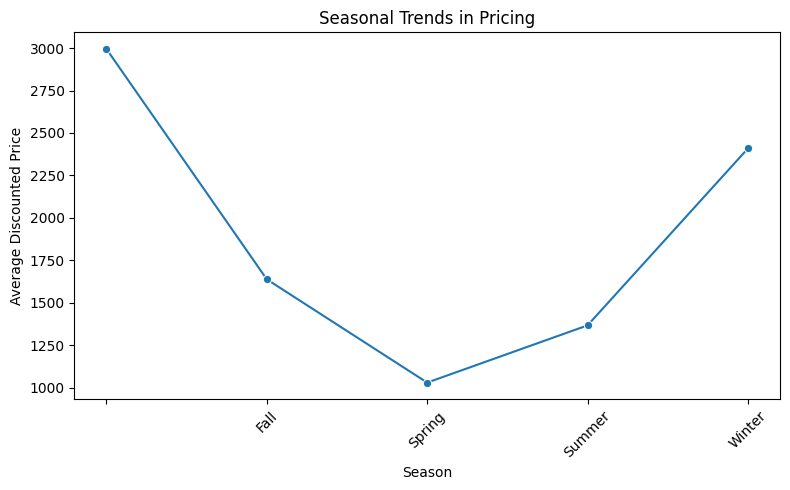

In [57]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average discounted price by season
seasonal_price = final_df.groupBy("data_season") \
    .agg(F.avg("data_discountedPrice").alias("avg_discounted_price")) \
    .orderBy("data_season")

# Convert to Pandas for visualization
seasonal_price_pd = seasonal_price.toPandas()

# Visualization: Line graph
plt.figure(figsize=(8, 5))
sns.lineplot(data=seasonal_price_pd, x="data_season", y="avg_discounted_price", marker="o")
plt.title("Seasonal Trends in Pricing")
plt.ylabel("Average Discounted Price")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [58]:
from pyspark.sql import functions as F

# Calculate total revenue (price * quantity) for each brand
top_brands_revenue = final_df.groupBy("data_brandName") \
    .agg(F.sum(F.col("data_discountedPrice")).alias("total_revenue")) \
    .orderBy(F.desc("total_revenue"))

top_brands_revenue.show(10, truncate=False)


+-------------------------+-------------+
|data_brandName           |total_revenue|
+-------------------------+-------------+
|Nike                     |5918015      |
|Puma                     |4419545      |
|ADIDAS                   |3955147      |
|United Colors of Benetton|2678491      |
|Fossil                   |1698697      |
|CASIO                    |1355145      |
|FNF                      |1162341      |
|French Connection        |1142081      |
|Catwalk                  |1090089      |
|Timberland               |1017409      |
+-------------------------+-------------+
only showing top 10 rows



In [59]:
from pyspark.sql.functions import col, sum
#Most Profitable Product Categories by Season
# Calculate total revenue by season and style type
seasonal_revenue = final_df.withColumn(
    "revenue", col("data_discountedPrice")
).groupBy("data_season", "data_styleType").agg(
    sum("revenue").alias("total_revenue")
).orderBy("data_season", "total_revenue", ascending=False)

# Show the results
seasonal_revenue.show(truncate=False)
#Helps prioritize inventory and marketing efforts for seasonal collections.

+-----------+--------------+-------------+
|data_season|data_styleType|total_revenue|
+-----------+--------------+-------------+
|Winter     |P             |17463002     |
|Winter     |DEL           |2494631      |
|Winter     |RTV           |439585       |
|Winter     |PMR           |32493        |
|Winter     |D             |21046        |
|Winter     |PMP           |16178        |
|Winter     |SCR           |7514         |
|Winter     |PCR           |6552         |
|Winter     |FRG           |4945         |
|Winter     |QCR           |3495         |
|Winter     |CON           |3405         |
|Winter     |CDL           |2917         |
|Winter     |OHS           |2499         |
|Winter     |LQD           |1499         |
|Summer     |P             |25939155     |
|Summer     |DEL           |2861803      |
|Summer     |RTV           |408485       |
|Summer     |SCR           |51234        |
|Summer     |LQD           |28540        |
|Summer     |D             |22447        |
+----------

In [60]:
#Customer Segmentation by Age Group and Gend
# Group by gender, age group, and style type
customer_segmentation = final_df.groupBy("data_gender", "data_ageGroup", "data_styleType").agg(
    sum("data_discountedPrice").alias("total_spent"),
    count("*").alias("popularity")
).orderBy("data_gender", "data_ageGroup", "total_spent", ascending=False)

# Show the results
customer_segmentation.show(truncate=False)
#tailor marketing campaigns and product designs for specific demographics.

+-----------+-------------+--------------+-----------+----------+
|data_gender|data_ageGroup|data_styleType|total_spent|popularity|
+-----------+-------------+--------------+-----------+----------+
|Women      |Kids-Unisex  |P             |1199       |1         |
|Women      |Kids-Girls   |DEL           |55699      |124       |
|Women      |Kids-Girls   |P             |44547      |69        |
|Women      |Adults-Women |P             |21723824   |14090     |
|Women      |Adults-Women |DEL           |4591123    |3531      |
|Women      |Adults-Women |RTV           |835281     |694       |
|Women      |Adults-Women |SCR           |30515      |37        |
|Women      |Adults-Women |PMR           |23653      |9         |
|Women      |Adults-Women |LQD           |20217      |18        |
|Women      |Adults-Women |PMP           |16785      |11        |
|Women      |Adults-Women |D             |11043      |10        |
|Women      |Adults-Women |CDL           |5937       |8         |
|Women    

In [66]:
final_df.printSchema()

root
 |-- meta_code: integer (nullable = true)
 |-- meta_requestId: string (nullable = true)
 |-- data_id: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- data_discountedPrice: integer (nullable = true)
 |-- data_styleType: string (nullable = true)
 |-- data_productTypeId: integer (nullable = true)
 |-- data_articleNumber: string (nullable = true)
 |-- data_productDisplayName: string (nullable = true)
 |-- data_variantName: string (nullable = true)
 |-- data_myntraRating: integer (nullable = true)
 |-- data_catalogAddDate: integer (nullable = true)
 |-- data_brandName: string (nullable = true)
 |-- data_ageGroup: string (nullable = true)
 |-- data_gender: string (nullable = true)
 |-- data_baseColour: string (nullable = true)
 |-- data_colour1: string (nullable = true)
 |-- data_colour2: string (nullable = true)
 |-- data_fashionType: string (nullable = true)
 |-- data_season: string (nullable = true)
 |-- data_year: integer (nullable = true)
 |-- data_usage: strin

In [67]:
from pyspark.sql.functions import col, sum

# Calculate total revenue by season and brand
seasonal_revenue_by_brand = final_df.withColumn(
    "revenue", col("data_discountedPrice")
).groupBy("data_season", "data_brandName").agg(
    sum("revenue").alias("total_revenue")
).orderBy("data_season", "total_revenue", ascending=False)

# Show the results
seasonal_revenue_by_brand.show(truncate=False)


+-----------+-------------------------+-------------+
|data_season|data_brandName           |total_revenue|
+-----------+-------------------------+-------------+
|Winter     |Fossil                   |1610620      |
|Winter     |CASIO                    |1242780      |
|Winter     |Catwalk                  |1017369      |
|Winter     |Fastrack                 |929428       |
|Winter     |Titan                    |891120       |
|Winter     |Police                   |763530       |
|Winter     |ESPRIT                   |649265       |
|Winter     |Timex                    |644950       |
|Winter     |Red Tape                 |549722       |
|Winter     |Lino Perros              |504301       |
|Winter     |Puma                     |497919       |
|Winter     |DKNY                     |485805       |
|Winter     |Ray-Ban                  |485631       |
|Winter     |Citizen                  |483900       |
|Winter     |maxima                   |426330       |
|Winter     |Murcia         

In [68]:
from pyspark.sql.functions import count

# Group by gender and style type
gender_preferences = final_df.groupBy("data_gender", "data_styleType", "data_baseColour").agg(
    count("*").alias("popularity")
).orderBy("data_gender", "popularity", ascending=False)

# Show the results
gender_preferences.show(truncate=False)


+-----------+--------------+---------------+----------+
|data_gender|data_styleType|data_baseColour|popularity|
+-----------+--------------+---------------+----------+
|Women      |P             |Black          |2404      |
|Women      |P             |White          |1676      |
|Women      |P             |Blue           |1276      |
|Women      |P             |Pink           |1051      |
|Women      |P             |Brown          |943       |
|Women      |P             |Purple         |808       |
|Women      |P             |Silver         |763       |
|Women      |P             |Green          |663       |
|Women      |P             |Grey           |646       |
|Women      |P             |Red            |643       |
|Women      |DEL           |Black          |463       |
|Women      |P             |Gold           |439       |
|Women      |DEL           |Brown          |381       |
|Women      |P             |Beige          |370       |
|Women      |DEL           |Pink           |368 

In [69]:
from pyspark.sql.functions import avg

# Group by style type and calculate average price and rating
price_rating_analysis = final_df.groupBy("data_styleType").agg(
    avg("data_discountedPrice").alias("avg_price"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("avg_price", ascending=False)

# Show the results
price_rating_analysis.show(truncate=False)


+--------------+------------------+-------------------+
|data_styleType|avg_price         |avg_rating         |
+--------------+------------------+-------------------+
|TR            |3720.0            |0.0                |
|QCR           |3495.0            |0.0                |
|OHS           |3065.6666666666665|0.6666666666666666 |
|D             |2209.740740740741 |0.25               |
|CON           |2102.2            |2.2                |
|PMR           |1804.423076923077 |0.5                |
|P             |1699.2756789645446|0.47728592363204025|
|PCR           |1574.357142857143 |0.42857142857142855|
|PMP           |1489.0            |0.29411764705882354|
|CDL           |1293.12           |0.44               |
|RTV           |1260.513004484305 |0.43637992831541217|
|DEL           |1252.050482879719 |0.43648589387516445|
|FRG           |1200.0            |0.2857142857142857 |
|LQD           |1052.7027027027027|0.1891891891891892 |
|A             |849.0             |0.5          

In [71]:
# Group by base color and calculate total revenue
color_revenue = final_df.groupBy("data_baseColour").agg(
    sum("data_discountedPrice").alias("total_revenue")
).orderBy("total_revenue", ascending=False)

# Show the results
color_revenue.show(truncate=False)


+---------------+-------------+
|data_baseColour|total_revenue|
+---------------+-------------+
|Black          |19197911     |
|White          |10425403     |
|Blue           |6585835      |
|Brown          |6262574      |
|Grey           |4572663      |
|Silver         |3215362      |
|Red            |2998091      |
|Green          |2422765      |
|Navy Blue      |2233161      |
|Purple         |1988349      |
|Pink           |1861297      |
|Gold           |1200152      |
|Beige          |1016312      |
|Steel          |987989       |
|Yellow         |804199       |
|Maroon         |672562       |
|Orange         |656709       |
|Olive          |650430       |
|Cream          |577971       |
|Multi          |563600       |
+---------------+-------------+
only showing top 20 rows



In [73]:
# Group by age group and style type
age_group_analysis = final_df.groupBy("data_ageGroup", "data_styleType").agg(
    sum("data_discountedPrice").alias("total_spent"),
    count("*").alias("popularity")
).orderBy("data_ageGroup", "total_spent", ascending=False)

# Show the results
age_group_analysis.show(truncate=False)


+-------------+--------------+-----------+----------+
|data_ageGroup|data_styleType|total_spent|popularity|
+-------------+--------------+-----------+----------+
|Kids-Unisex  |P             |146208     |242       |
|Kids-Unisex  |DEL           |19600      |28        |
|Kids-Girls   |P             |240981     |413       |
|Kids-Girls   |DEL           |141151     |435       |
|Kids-Girls   |D             |349        |1         |
|Kids-Boys    |P             |352033     |498       |
|Kids-Boys    |DEL           |186451     |567       |
|Kids-Boys    |PCR           |6432       |5         |
|Kids-Boys    |D             |349        |1         |
|Adults-Women |P             |21728572   |14092     |
|Adults-Women |DEL           |4591123    |3531      |
|Adults-Women |RTV           |835281     |694       |
|Adults-Women |SCR           |30515      |37        |
|Adults-Women |PMR           |23653      |9         |
|Adults-Women |LQD           |20217      |18        |
|Adults-Women |PMP          

In [74]:
# Filter products with low ratings and calculate sales
underperforming_products = final_df.filter(col("data_myntraRating") < 3).groupBy("data_productDisplayName").agg(
    count("*").alias("sales_count"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("avg_rating", ascending=True)

# Show the results
underperforming_products.show(truncate=False)


+--------------------------------------------------------------------+-----------+----------+
|data_productDisplayName                                             |sales_count|avg_rating|
+--------------------------------------------------------------------+-----------+----------+
|Wildcraft Unisex Red & Black Backpack                               |5          |0.0       |
|Wildcraft Unisex Orange Alpinist 55 Backpack                        |1          |0.0       |
|Carlton London Women Coffee Brown Desert Boots                      |1          |0.0       |
|Lee Women Mid Stone Blue Maxi Fit Jeans                             |1          |0.0       |
|Jockey Women Black Bikini Brief 1803-0105                           |1          |0.0       |
|Hanes Men Black Crew Pack Of 3 Innerwear T-Shirts                   |1          |0.0       |
|United Colors of Benetton Grey Flip Flops                           |1          |0.0       |
|Lee Women Rinsed Blue Roxy Fit Jeans                       

In [76]:
from pyspark.sql.functions import col, sum

# Calculate total revenue for each product by season
top_products_season = final_df.groupBy("data_season", "data_productDisplayName").agg(
    sum("data_discountedPrice").alias("total_revenue")
).orderBy("data_season", "total_revenue", ascending=False)

# Show the top products by season
top_products_season.show(truncate=False)


+-----------+----------------------------------------------+-------------+
|data_season|data_productDisplayName                       |total_revenue|
+-----------+----------------------------------------------+-------------+
|Winter     |Nautica Men Black Dial Chronograph Watch      |156435       |
|Winter     |Timex Men Black Dial Watch                    |120140       |
|Winter     |Titan Men White Dial Watch                    |105200       |
|Winter     |Giordano Men Black Dial Watch                 |102528       |
|Winter     |Morellato Men Silver Dial Watch               |83250        |
|Winter     |Fastrack Men Black Dial Watch                 |78745        |
|Winter     |Ed Hardy Men Black Dial Watch                 |74980        |
|Winter     |Citizen Men Black Dial Chronograph Watch      |73200        |
|Winter     |Titan Men Black Dial Watch                    |72930        |
|Winter     |Catwalk Women Black Heels                     |70485        |
|Winter     |Miss Sixty S

In [77]:
# Calculate average discount percentage and total revenue by style type
discount_revenue_analysis = final_df.withColumn(
    "discount_percentage",
    when(col("label") > 0, (col("label") - col("data_discountedPrice")) / col("label") * 100).otherwise(0)
).groupBy("data_styleType").agg(
    avg("discount_percentage").alias("avg_discount"),
    sum("data_discountedPrice").alias("total_revenue"),
    count("*").alias("purchase_volume")
).orderBy("avg_discount", ascending=False)

# Show the results
discount_revenue_analysis.show(truncate=False)


+--------------+------------------+-------------+---------------+
|data_styleType|avg_discount      |total_revenue|purchase_volume|
+--------------+------------------+-------------+---------------+
|TR            |20.0              |3720         |1              |
|PMR           |16.55377750754339 |46915        |26             |
|BO            |16.372856077554065|888          |5              |
|CDL           |15.411800630960753|32328        |25             |
|FRG           |15.332194631293087|8400         |7              |
|CON           |13.01079893079893 |10511        |5              |
|WHI           |12.606960950764007|1365         |4              |
|PCR           |11.788242258033746|22041        |14             |
|D             |10.55523230338388 |59663        |28             |
|SCR           |10.207505265027239|86639        |136            |
|DEL           |9.371981143571938 |8556513      |6841           |
|P             |5.100897817775308 |61442410     |36167          |
|LQD      

In [78]:
# Calculate total revenue and average rating by brand
brand_performance = final_df.groupBy("data_brandName").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("total_revenue", ascending=False)

# Show the results
brand_performance.show(truncate=False)


+-------------------------+-------------+--------------------+
|data_brandName           |total_revenue|avg_rating          |
+-------------------------+-------------+--------------------+
|Nike                     |5918015      |0.8270540172492056  |
|Puma                     |4419545      |0.5919923736892279  |
|ADIDAS                   |3955147      |0.5574622984919396  |
|United Colors of Benetton|2678491      |0.35764555342290466 |
|Fossil                   |1698697      |0.29936305732484075 |
|CASIO                    |1355145      |1.0                 |
|FNF                      |1162341      |0.07661290322580645 |
|French Connection        |1142081      |0.5439814814814815  |
|Catwalk                  |1090089      |0.135752688172043   |
|Timberland               |1017409      |0.136               |
|Fastrack                 |976459       |0.20203488372093023 |
|Lucera                   |967675       |0.09939759036144578 |
|Reebok                   |946256       |1.164133738601

In [79]:
# Group by gender, age group, and style type
customer_preferences = final_df.groupBy("data_gender", "data_ageGroup", "data_styleType").agg(
    count("*").alias("popularity"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("data_gender", "data_ageGroup", "popularity", ascending=False)

# Show the results
customer_preferences.show(truncate=False)


+-----------+-------------+--------------+----------+-------------------+
|data_gender|data_ageGroup|data_styleType|popularity|avg_rating         |
+-----------+-------------+--------------+----------+-------------------+
|Women      |Kids-Unisex  |P             |1         |0.0                |
|Women      |Kids-Girls   |DEL           |124       |0.9838709677419355 |
|Women      |Kids-Girls   |P             |69        |0.5652173913043478 |
|Women      |Adults-Women |P             |14090     |0.4169623846699787 |
|Women      |Adults-Women |DEL           |3531      |0.3511753044463325 |
|Women      |Adults-Women |RTV           |694       |0.43804034582132567|
|Women      |Adults-Women |SCR           |37        |0.0                |
|Women      |Adults-Women |LQD           |18        |0.0                |
|Women      |Adults-Women |PMP           |11        |0.09090909090909091|
|Women      |Adults-Women |D             |10        |0.3                |
|Women      |Adults-Women |PMR        

In [80]:
# Group by season and color
season_color_trends = final_df.groupBy("data_season", "data_baseColour").agg(
    count("*").alias("popularity")
).orderBy("data_season", "popularity", ascending=False)

# Show the results
season_color_trends.show(truncate=False)


+-----------+---------------+----------+
|data_season|data_baseColour|popularity|
+-----------+---------------+----------+
|Winter     |Black          |2555      |
|Winter     |Brown          |1093      |
|Winter     |White          |887       |
|Winter     |Blue           |527       |
|Winter     |Silver         |472       |
|Winter     |Gold           |360       |
|Winter     |Grey           |340       |
|Winter     |Pink           |288       |
|Winter     |Red            |286       |
|Winter     |Green          |216       |
|Winter     |Purple         |215       |
|Winter     |Steel          |187       |
|Winter     |Beige          |173       |
|Winter     |Navy Blue      |123       |
|Winter     |Maroon         |85        |
|Winter     |Yellow         |78        |
|Winter     |Multi          |74        |
|Winter     |Orange         |57        |
|Winter     |Olive          |55        |
|Winter     |Copper         |53        |
+-----------+---------------+----------+
only showing top

In [81]:
# Filter products with low ratings and sales
low_demand_products = final_df.filter((col("data_myntraRating") < 3) & (col("data_discountedPrice") < 1000)).groupBy("data_productDisplayName").agg(
    count("*").alias("sales_count"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("sales_count", ascending=True)

# Show the results
low_demand_products.show(truncate=False)


+-------------------------------------------------+-----------+----------+
|data_productDisplayName                          |sales_count|avg_rating|
+-------------------------------------------------+-----------+----------+
|ADIDAS Unisex Adi Liner Yellow Flip Flop         |1          |1.0       |
|Jealous 21 Women Green Printed T-Shirt           |1          |1.0       |
|Wildcraft Unisex Grey Courier Messenger Bag      |1          |1.0       |
|Femella Women Blue Skinny Leggings               |1          |0.0       |
|Converse Unisex Black Flip Flops                 |1          |0.0       |
|Wills Lifestyle Red & White Checked Top          |1          |0.0       |
|W Women White Kurta                              |1          |1.0       |
|Femella Women Wine Skinny Leggings               |1          |0.0       |
|Numero Uno Men's Olive Brown Shoe                |1          |1.0       |
|Wildcraft Unisex Grey & Orange Printed Duffle Bag|1          |1.0       |
|Myntra Men Yellow Stripe

In [82]:
from pyspark.sql.functions import collect_list, explode

# Generate co-purchase pairs
co_purchase_analysis = final_df.groupBy("data_id").agg(collect_list("data_styleType").alias("styles"))
co_purchase_analysis = co_purchase_analysis.withColumn("style", explode(col("styles")))

# Count co-occurrences
co_occurrence = co_purchase_analysis.groupBy("style").pivot("styles").count()

# Show co-occurrence matrix
co_occurrence.show(truncate=False)


AnalysisException: [PIVOT_VALUE_DATA_TYPE_MISMATCH] Invalid pivot value '[A]': value data type array<string> does not match pivot column data type array<string>.

In [84]:
from pyspark.sql.functions import avg, count, sum, col, when

# Calculate discount percentage and revenue
elasticity_analysis = final_df.withColumn(
    "discount_percentage",
    when(col("label") > 0, (col("label") - col("data_discountedPrice")) / col("label") * 100).otherwise(0)
).groupBy("data_season", "data_gender").agg(
    avg("discount_percentage").alias("avg_discount"),
    sum("data_discountedPrice").alias("total_revenue"),
    count("*").alias("purchase_count")
).orderBy("data_season", "data_gender", "avg_discount", ascending=False)

# Show the results
elasticity_analysis.show(truncate=False)


+-----------+-----------+------------------+-------------+--------------+
|data_season|data_gender|avg_discount      |total_revenue|purchase_count|
+-----------+-----------+------------------+-------------+--------------+
|Winter     |Women      |3.3589764314960595|8856536      |4620          |
|Winter     |Unisex     |18.793157264780124|1075775      |617           |
|Winter     |Men        |4.892000255387297 |10543738     |3227          |
|Winter     |Girls      |1.7171933724692836|16266        |35            |
|Winter     |Boys       |12.025423768717024|7446         |20            |
|Summer     |Women      |2.6021414232703046|11414878     |8434          |
|Summer     |Unisex     |6.905189009533093 |1268956      |938           |
|Summer     |Men        |7.137934676915693 |16180236     |10877         |
|Summer     |Girls      |23.6911371085184  |222985       |536           |
|Summer     |Boys       |27.11198199189906 |278907       |691           |
|Spring     |Women      |7.05132165950

In [85]:
# Calculate revenue by brand, style type, and season
brand_diversification = final_df.groupBy("data_brandName", "data_season", "data_styleType").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    count("*").alias("product_count")
).orderBy("data_brandName", "data_season", "total_revenue", ascending=False)

# Show the results
brand_diversification.show(truncate=False)


+------------------+-----------+--------------+-------------+-------------+
|data_brandName    |data_season|data_styleType|total_revenue|product_count|
+------------------+-----------+--------------+-------------+-------------+
|yelloe            |Summer     |P             |51480        |32           |
|yelloe            |Fall       |P             |790          |1            |
|vogue             |Winter     |P             |76743        |16           |
|test              |Spring     |D             |500          |1            |
|s.Oliver          |Summer     |P             |93139        |61           |
|s.Oliver          |Fall       |P             |136233       |67           |
|roxy              |Winter     |P             |109488       |59           |
|roxy              |Summer     |P             |2390         |2            |
|pierre cardin     |Spring     |P             |3050         |2            |
|maxima            |Winter     |P             |414041       |252          |
|maxima     

In [86]:
# Group by rating and calculate sales and revenue
rating_sales_analysis = final_df.groupBy("data_myntraRating").agg(
    count("*").alias("sales_count"),
    sum("data_discountedPrice").alias("total_revenue")
).orderBy("data_myntraRating", ascending=False)

# Show the results
rating_sales_analysis.show(truncate=False)


+-----------------+-----------+-------------+
|data_myntraRating|sales_count|total_revenue|
+-----------------+-----------+-------------+
|11               |4          |8696         |
|10               |42         |57459        |
|9                |1          |487          |
|2                |1          |2999         |
|1                |20379      |30974117     |
|0                |24019      |40714623     |
+-----------------+-----------+-------------+



In [88]:
from pyspark.sql.functions import countDistinct

# Count distinct products purchased by each customer
customer_loyalty = final_df.groupBy("data_id", "data_gender", "data_ageGroup").agg(
    countDistinct("data_productDisplayName").alias("unique_purchases"),
    sum("data_discountedPrice").alias("total_spent")
).orderBy("total_spent", ascending=False)

# Show the results
customer_loyalty.show(truncate=False)


+-------+-----------+-------------+----------------+-----------+
|data_id|data_gender|data_ageGroup|unique_purchases|total_spent|
+-------+-----------+-------------+----------------+-----------+
|35288  |Unisex     |Adults-Unisex|1               |28950      |
|35282  |Unisex     |Adults-Unisex|1               |21950      |
|52686  |Men        |Adults-Men   |1               |21220      |
|59253  |Men        |Adults-Men   |1               |18995      |
|5062   |Men        |Adults-Men   |1               |18900      |
|28438  |Women      |Adults-Women |1               |17995      |
|53014  |Women      |Adults-Women |1               |17500      |
|52691  |Women      |Adults-Women |1               |17150      |
|52690  |Women      |Adults-Women |1               |17000      |
|29945  |Men        |Adults-Men   |1               |16450      |
|29923  |Men        |Adults-Men   |1               |15550      |
|51639  |Men        |Adults-Men   |1               |15495      |
|53020  |Women      |Adul

In [89]:
# Group by brand and calculate average price and rating
brand_positioning = final_df.groupBy("data_brandName").agg(
    avg("data_discountedPrice").alias("avg_price"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("avg_price", ascending=False)

# Show the results
brand_positioning.show(truncate=False)


+--------------+------------------+--------------------+
|data_brandName|avg_price         |avg_rating          |
+--------------+------------------+--------------------+
|Suunto        |25450.0           |0.0                 |
|Just Cavalli  |13963.888888888889|0.0                 |
|Nautica       |9513.125          |0.03125             |
|Morellato     |9094.0            |0.0                 |
|SKAGEN        |8745.0            |0.16666666666666666 |
|Kenneth Cole  |8133.461538461538 |0.3076923076923077  |
|Citizen       |7793.939393939394 |0.25757575757575757 |
|MISS SIXTY    |7714.761904761905 |0.0                 |
|Azzaro        |7650.0            |0.0                 |
|Carrera       |7624.074074074074 |0.0                 |
|Being Human   |7381.25           |0.0                 |
|Salomon       |7199.0            |0.21428571428571427 |
|DKNY          |7156.025641025641 |0.10256410256410256 |
|OAKLEY        |6934.878787878788 |0.09090909090909091 |
|Satya Paul    |6852.1428571428

In [91]:
# Top-performing products
top_products = final_df.groupBy("data_productDisplayName").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("total_revenue", ascending=False).limit(5)

# Bottom-performing products
bottom_products = final_df.groupBy("data_productDisplayName").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("total_revenue", ascending=True).limit(5)

# Show results
top_products.show(truncate=False)
bottom_products.show(truncate=False)


+----------------------------------------+-------------+-------------------+
|data_productDisplayName                 |total_revenue|avg_rating         |
+----------------------------------------+-------------+-------------------+
|Lucera Women Silver Earrings            |210549       |0.10975609756097561|
|Lucera Women Silver Pendant             |166353       |0.07142857142857142|
|Nautica Men Black Dial Chronograph Watch|156435       |0.0                |
|Lucera Women Silver Ring                |121362       |0.0                |
|Timex Men Black Dial Watch              |120140       |0.45454545454545453|
+----------------------------------------+-------------+-------------------+

+------------------------------------------------------------+-------------+----------+
|data_productDisplayName                                     |total_revenue|avg_rating|
+------------------------------------------------------------+-------------+----------+
|Lino Perros Women Ladies Belts Pink Pink 

In [92]:
# Group by year and style type
style_trends = final_df.groupBy("data_year", "data_styleType").agg(
    count("*").alias("popularity")
).orderBy("data_year", "popularity", ascending=False)

# Show the results
style_trends.show(truncate=False)


+---------+--------------+----------+
|data_year|data_styleType|popularity|
+---------+--------------+----------+
|2019     |P             |33        |
|2018     |P             |383       |
|2018     |DEL           |15        |
|2018     |CDL           |4         |
|2018     |D             |2         |
|2018     |BO            |1         |
|2017     |P             |1784      |
|2017     |DEL           |827       |
|2017     |RTV           |255       |
|2017     |LQD           |21        |
|2017     |SCR           |11        |
|2017     |D             |6         |
|2017     |BO            |4         |
|2017     |PCR           |3         |
|2017     |WHI           |3         |
|2017     |TR            |1         |
|2017     |FRG           |1         |
|2017     |CON           |1         |
|2016     |P             |5404      |
|2016     |DEL           |417       |
+---------+--------------+----------+
only showing top 20 rows



In [94]:
from pyspark.sql.functions import col, sum, count

# Calculate revenue at multiple levels
multi_level_revenue = final_df.groupBy("data_brandName", "data_styleType", "data_season").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    count("*").alias("sales_count")
).orderBy("data_brandName", "total_revenue", ascending=False)

# Show the results
multi_level_revenue.show(truncate=False)


+------------------+--------------+-----------+-------------+-----------+
|data_brandName    |data_styleType|data_season|total_revenue|sales_count|
+------------------+--------------+-----------+-------------+-----------+
|yelloe            |P             |Summer     |51480        |32         |
|yelloe            |P             |Fall       |790          |1          |
|vogue             |P             |Winter     |76743        |16         |
|test              |D             |Spring     |500          |1          |
|s.Oliver          |P             |Fall       |136233       |67         |
|s.Oliver          |P             |Summer     |93139        |61         |
|roxy              |P             |Winter     |109488       |59         |
|roxy              |P             |Summer     |2390         |2          |
|pierre cardin     |P             |Spring     |3050         |2          |
|maxima            |P             |Winter     |414041       |252        |
|maxima            |RTV           |Win

In [95]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg

# Define a window for rolling calculations
rolling_window = Window.partitionBy("data_styleType").orderBy("data_catalogAddDate").rowsBetween(-3, 0)

# Calculate rolling average sales
rolling_sales = final_df.withColumn(
    "rolling_avg_sales",
    avg("data_discountedPrice").over(rolling_window)
).orderBy("data_styleType", "data_catalogAddDate")

# Show the results
rolling_sales.select("data_styleType", "data_catalogAddDate", "rolling_avg_sales").show(truncate=False)


+--------------+-------------------+-----------------+
|data_styleType|data_catalogAddDate|rolling_avg_sales|
+--------------+-------------------+-----------------+
|A             |1344955830         |1099.0           |
|A             |1451568318         |849.0            |
|BO            |1454665918         |126.0            |
|BO            |1454665918         |126.0            |
|BO            |1454674970         |122.0            |
|BO            |1454676707         |123.0            |
|BO            |1471759029         |190.5            |
|CDL           |1360659911         |699.0            |
|CDL           |1452002942         |599.0            |
|CDL           |1456294217         |515.6666666666666|
|CDL           |1456294217         |526.5            |
|CDL           |1457425833         |487.5            |
|CDL           |1457613843         |812.5            |
|CDL           |1457613843         |1195.25          |
|CDL           |1457613843         |1505.25          |
|CDL      

In [97]:
# Assuming a cost column exists or you have a function to calculate it
from pyspark.sql.functions import expr

# Calculate contribution margin
margin_analysis = final_df.withColumn(
    "contribution_margin",
    col("data_discountedPrice") - expr("data_discountedPrice * 0.4")  # Assuming 40% cost-to-price ratio
).groupBy("data_productDisplayName").agg(
    sum("contribution_margin").alias("total_margin"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("total_margin", ascending=False)

# Show the results
margin_analysis.show(truncate=False)


+----------------------------------------+------------+--------------------+
|data_productDisplayName                 |total_margin|avg_rating          |
+----------------------------------------+------------+--------------------+
|Lucera Women Silver Earrings            |126329.4    |0.10975609756097561 |
|Lucera Women Silver Pendant             |99811.8     |0.07142857142857142 |
|Nautica Men Black Dial Chronograph Watch|93861.0     |0.0                 |
|Lucera Women Silver Ring                |72817.2     |0.0                 |
|Timex Men Black Dial Watch              |72084.0     |0.45454545454545453 |
|Titan Men White Dial Watch              |63120.0     |0.07692307692307693 |
|Giordano Men Black Dial Watch           |61516.8     |0.05263157894736842 |
|Arrow Men Black Formal Shoes            |56205.6     |0.25                |
|FNF Multi Coloured Printed Sari         |54123.6     |0.0625              |
|Lucera Silver Ring                      |53895.0     |0.07142857142857142 |

In [102]:
# Group by season and color combinations
color_combinations = final_df.groupBy("data_season", "data_baseColour", "data_colour1", "data_colour2").agg(
    count("*").alias("popularity")
).orderBy("data_season", "popularity", ascending=False)

# Show the results
color_combinations.show(truncate=False)


+-----------+---------------+------------+------------+----------+
|data_season|data_baseColour|data_colour1|data_colour2|popularity|
+-----------+---------------+------------+------------+----------+
|Winter     |Black          |NA          |NA          |1538      |
|Winter     |Brown          |NA          |NA          |789       |
|Winter     |Black          |            |            |406       |
|Winter     |White          |NA          |NA          |386       |
|Winter     |Blue           |NA          |NA          |285       |
|Winter     |Gold           |NA          |NA          |213       |
|Winter     |Silver         |NA          |NA          |204       |
|Winter     |Grey           |NA          |NA          |178       |
|Winter     |Red            |NA          |NA          |175       |
|Winter     |Pink           |NA          |NA          |165       |
|Winter     |Brown          |            |            |158       |
|Winter     |Purple         |NA          |NA          |147    

In [103]:
# Group customers by total spending
customer_segments = final_df.groupBy("data_id").agg(
    sum("data_discountedPrice").alias("total_spent")
).withColumn(
    "spending_segment",
    when(col("total_spent") > 10000, "High Spender")
    .when(col("total_spent") > 5000, "Medium Spender")
    .otherwise("Low Spender")
).groupBy("spending_segment").agg(
    count("*").alias("customer_count"),
    avg("total_spent").alias("avg_spent")
)

# Show the results
customer_segments.show(truncate=False)


+----------------+--------------+------------------+
|spending_segment|customer_count|avg_spent         |
+----------------+--------------+------------------+
|Medium Spender  |1764          |7012.326530612245 |
|High Spender    |203           |12590.536945812808|
|Low Spender     |42479         |1338.4696074044418|
+----------------+--------------+------------------+



In [111]:
from pyspark.sql.functions import when

# Group products into price ranges
pricing_analysis = final_df.withColumn(
    "price_range",
    when(col("data_discountedPrice") < 500, "<500")
    .when((col("data_discountedPrice") >= 500) & (col("data_discountedPrice") < 1500), "500-1500")
    .when((col("data_discountedPrice") >= 1500) & (col("data_discountedPrice") < 3000), "1500-3000")
    .otherwise(">3000")
).groupBy("data_gender", "data_season", "price_range").agg(
    count("*").alias("sales_count"),
    sum("data_discountedPrice").alias("total_revenue")
).orderBy("data_gender", "data_season", col("sales_count").desc())

# Show results
pricing_analysis.show(truncate=False)


+-----------+-----------+-----------+-----------+-------------+
|data_gender|data_season|price_range|sales_count|total_revenue|
+-----------+-----------+-----------+-----------+-------------+
|Boys       |Fall       |<500       |78         |28957        |
|Boys       |Fall       |500-1500   |27         |23091        |
|Boys       |Fall       |>3000      |5          |20850        |
|Boys       |Fall       |1500-3000  |3          |6497         |
|Boys       |Spring     |<500       |5          |1618         |
|Boys       |Spring     |500-1500   |1          |999          |
|Boys       |Summer     |<500       |551        |160526       |
|Boys       |Summer     |500-1500   |137        |111688       |
|Boys       |Summer     |1500-3000  |2          |3398         |
|Boys       |Summer     |>3000      |1          |3295         |
|Boys       |Winter     |<500       |18         |5548         |
|Boys       |Winter     |500-1500   |2          |1898         |
|Girls      |Fall       |<500       |60 

In [116]:
from pyspark.sql.functions import when, col

# Calculate optimal discount range
discount_analysis = final_df.withColumn(
    "discount_percentage",
    ((col("label") - col("data_discountedPrice")) / col("label")) * 100
).withColumn(
    "discount_range",
    when(col("discount_percentage") < 10, "<10%")
    .when((col("discount_percentage") >= 10) & (col("discount_percentage") < 30), "10-30%")
    .when((col("discount_percentage") >= 30) & (col("discount_percentage") < 50), "30-50%")
    .otherwise(">50%")
).groupBy("discount_range").agg(
    count("*").alias("sales_count"),
    sum("data_discountedPrice").alias("total_revenue")
).orderBy(col("sales_count").desc())

# Show results
discount_analysis.show(truncate=False)


+--------------+-----------+-------------+
|discount_range|sales_count|total_revenue|
+--------------+-----------+-------------+
|<10%          |37300      |65053034     |
|10-30%        |3056       |3835260      |
|>50%          |2916       |1544326      |
|30-50%        |1174       |1325761      |
+--------------+-----------+-------------+



In [117]:
from pyspark.sql.functions import col, count, sum

# Filter for unsold winter products from previous years
unsold_products = final_df.filter(
    (col("data_year") < 2023) & (col("data_season") == "Winter")
).groupBy("data_productDisplayName", "data_brandName").agg(
    count("*").alias("unsold_count"),
    sum("label").alias("potential_revenue_loss")  # Assuming 'label' is the original price
).orderBy(col("potential_revenue_loss").desc())

# Show results
unsold_products.show(truncate=False)


+----------------------------------------------+-------------------------+------------+----------------------+
|data_productDisplayName                       |data_brandName           |unsold_count|potential_revenue_loss|
+----------------------------------------------+-------------------------+------------+----------------------+
|Nautica Men Black Dial Chronograph Watch      |Nautica                  |13          |156435                |
|Timex Men Black Dial Watch                    |Timex                    |22          |120140                |
|Giordano Men Black Dial Watch                 |GIORDANO                 |19          |110450                |
|Titan Men White Dial Watch                    |Titan                    |26          |105200                |
|Morellato Men Silver Dial Watch               |Morellato                |9           |83250                 |
|Fastrack Men Black Dial Watch                 |Fastrack                 |41          |78745                 |
|

In [115]:
# Calculate profitability by category
category_profitability = final_df.groupBy("data_displayCategories").agg(
    avg("data_vat").alias("avg_vat"),
    count("*").alias("sales_volume"),
    sum("data_discountedPrice").alias("total_revenue")
).orderBy(col("total_revenue").desc())

# Show results
category_profitability.show(truncate=False)


+---------------------------------------------------------------------+------------------+------------+-------------+
|data_displayCategories                                               |avg_vat           |sales_volume|total_revenue|
+---------------------------------------------------------------------+------------------+------------+-------------+
|Accessories                                                          |13.592643194955334|9515        |21463790     |
|Footwear                                                             |14.498714836498644|7003        |16953850     |
|Casual Wear                                                          |5.501028101439342 |8754        |9572107      |
|NULL                                                                 |9.952228749136143 |5788        |7395242      |
|Footwear,Sale                                                        |14.389261744966444|894         |2430895      |
|Ethnic Wear                                            

In [118]:
from pyspark.sql.functions import count

cross_sell_opportunities = final_df.groupBy("data_styleType", "data_productTypeId").agg(
    count("*").alias("combination_count")
).orderBy("combination_count", ascending=False)

# Show results
cross_sell_opportunities.show(truncate=False)


+--------------+------------------+-----------------+
|data_styleType|data_productTypeId|combination_count|
+--------------+------------------+-----------------+
|P             |288               |4949             |
|P             |289               |4561             |
|P             |320               |2843             |
|P             |361               |2370             |
|P             |323               |1537             |
|P             |294               |1491             |
|P             |310               |1482             |
|P             |364               |1156             |
|P             |366               |1042             |
|P             |2                 |1036             |
|P             |394               |889              |
|P             |339               |875              |
|DEL           |289               |756              |
|P             |365               |675              |
|P             |305               |654              |
|P             |360         

In [119]:
top_brands_segment = final_df.groupBy("data_brandName", "data_usage", "data_gender").agg(
    count("*").alias("usage_count")
).orderBy("usage_count", ascending=False)

# Show results
top_brands_segment.show(truncate=False)


+-------------------------+----------+-----------+-----------+
|data_brandName           |data_usage|data_gender|usage_count|
+-------------------------+----------+-----------+-----------+
|Nike                     |Sports    |Men        |1030       |
|Puma                     |Casual    |Men        |1008       |
|United Colors of Benetton|Casual    |Men        |792        |
|Catwalk                  |Casual    |Women      |732        |
|ADIDAS                   |Casual    |Men        |688        |
|United Colors of Benetton|Casual    |Women      |679        |
|ADIDAS                   |Sports    |Men        |666        |
|Baggit                   |Casual    |Women      |625        |
|Fabindia                 |Ethnic    |Women      |550        |
|Lino Perros              |Casual    |Women      |497        |
|Nike                     |Casual    |Men        |455        |
|Wrangler                 |Casual    |Men        |442        |
|Puma                     |Sports    |Men        |412  

In [120]:
from pyspark.sql.functions import avg

material_ratings = final_df.groupBy("data_baseColour").agg(
    avg("data_myntraRating").alias("avg_rating")
).orderBy("avg_rating", ascending=False)

# Show results
material_ratings.show(truncate=False)


+-----------------+-------------------+
|data_baseColour  |avg_rating         |
+-----------------+-------------------+
|Fluorescent Green|0.8                |
|Grey             |0.5483400218898212 |
|Green            |0.5335538752362949 |
|Off White        |0.532967032967033  |
|Navy Blue        |0.5321049692908989 |
|Teal             |0.525              |
|White            |0.5243682310469314 |
|Purple           |0.5203895313451005 |
|Red              |0.5183075671277462 |
|Yellow           |0.5121951219512195 |
|Blue             |0.5117838277123121 |
|Magenta          |0.49612403100775193|
|Turquoise Blue   |0.4927536231884058 |
|Orange           |0.49056603773584906|
|Maroon           |0.47160068846815834|
|Lavender         |0.4691358024691358 |
|Black            |0.46557747636662555|
|Cream            |0.4461538461538462 |
|Beige            |0.43124165554072097|
|Pink             |0.42235357334766255|
+-----------------+-------------------+
only showing top 20 rows



In [121]:
weight_profit_analysis = final_df.groupBy("data_fashionType", "data_weight").agg(
    sum("data_discountedPrice").alias("total_revenue"),
    avg("data_myntraRating").alias("avg_rating")
).orderBy("total_revenue", ascending=False)

# Show results
weight_profit_analysis.show(truncate=False)


+----------------+-----------+-------------+-------------------+
|data_fashionType|data_weight|total_revenue|avg_rating         |
+----------------+-----------+-------------+-------------------+
|Fashion         |0          |66663092     |0.495521865305714  |
|Core            |0          |5082729      |0.23405683598120386|
|                |0          |11860        |0.0                |
|Core            |90         |500          |0.0                |
|Fashion         |100        |200          |1.0                |
+----------------+-----------+-------------+-------------------+



In [122]:
from pyspark.sql.functions import sum, round

age_group_analysis = final_df.groupBy("data_brandName", "data_ageGroup").agg(
    sum("data_discountedPrice").alias("age_group_revenue")
).withColumn(
    "total_brand_revenue", sum("age_group_revenue").over(Window.partitionBy("data_brandName"))
).withColumn(
    "age_group_percentage", round((col("age_group_revenue") / col("total_brand_revenue")) * 100, 2)
).orderBy("age_group_percentage", ascending=False)

# Show results
age_group_analysis.show(truncate=False)


+-------------------+-------------+-----------------+-------------------+--------------------+
|data_brandName     |data_ageGroup|age_group_revenue|total_brand_revenue|age_group_percentage|
+-------------------+-------------+-----------------+-------------------+--------------------+
|Arrow New York     |Adults-Men   |40777            |40777              |100.0               |
|Arrow Sport        |Adults-Men   |161480           |161480             |100.0               |
|109F               |Adults-Women |46171            |46171              |100.0               |
|Arrow Woman        |Adults-Women |213481           |213481             |100.0               |
|2go ACTIVE GEAR USA|Adults-Men   |10634            |10634              |100.0               |
|Avengers           |Kids-Boys    |3110             |3110               |100.0               |
|ASPEN              |Adults-Women |121610           |121610             |100.0               |
|Avirate            |Adults-Women |112232         

In [ ]:
#need conversion of date in to proper form for better insights

In [132]:
from pyspark.sql.functions import from_unixtime

# Convert Unix timestamp to readable date
final_df = final_df.withColumn("data_catalogAddDate", from_unixtime(col("data_catalogAddDate").cast("long"), "yyyy-MM-dd"))


In [134]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")


In [135]:
from pyspark.sql.functions import from_unixtime, col

# If timestamps are in milliseconds
final_df = final_df.withColumn("data_catalogAddDate", (col("data_catalogAddDate") / 1000).cast("long"))

# Convert Unix timestamps to readable date
final_df = final_df.withColumn("data_catalogAddDate", from_unixtime(col("data_catalogAddDate"), "yyyy-MM-dd HH:mm:ss"))


In [136]:
final_df.select("data_catalogAddDate").show(truncate=False)


+-------------------+
|data_catalogAddDate|
+-------------------+
|NULL               |
+-------------------+



In [138]:
final_df.select("data_catalogAddDate").show(truncate=False, n=50)


+-------------------+
|data_catalogAddDate|
+-------------------+
|NULL               |
+-------------------+



In [137]:
from pyspark.sql.functions import col, avg, row_number
from pyspark.sql.window import Window

# Calculate average rating for each brand and year
brand_year_analysis = final_df.groupBy("data_year", "data_brandName") \
    .agg(avg("data_myntraRating").alias("avg_rating"))

# Get the top brand for each year
window_spec = Window.partitionBy("data_year").orderBy(col("avg_rating").desc())
top_brands_by_year = brand_year_analysis.withColumn("rank", row_number().over(window_spec)) \
    .filter(col("rank") == 1)

# Show results
top_brands_by_year.select("data_year", "data_brandName", "avg_rating").show(truncate=False)


+---------+--------------+----------+
|data_year|data_brandName|avg_rating|
+---------+--------------+----------+
|2011     |Doodle        |1.0       |
+---------+--------------+----------+



In [139]:
from pyspark.sql.functions import count, rank
from pyspark.sql.window import Window

# Window specification
window_spec = Window.partitionBy("data_season", "data_year").orderBy(col("product_count").desc())

# Calculate seasonal trends
seasonal_trends = final_df.groupBy("data_season", "data_year", "data_styleType") \
    .agg(count("*").alias("product_count")) \
    .withColumn("rank", rank().over(window_spec)) \
    .filter(col("rank") == 1) \
    .select("data_season", "data_year", "data_styleType", "product_count")

seasonal_trends.show(truncate=False)


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
from pyspark.sql.functions import sum, lag, col, ((col("current_revenue") - col("previous_revenue")) / col("previous_revenue")) * 100

# Window specification for year comparison
window_spec = Window.partitionBy("data_brandName").orderBy("data_year")

# Calculate year-on-year growth
brand_growth = final_df.groupBy("data_brandName", "data_year") \
    .agg(sum("data_discountedPrice").alias("revenue")) \
    .withColumn("previous_revenue", lag("revenue").over(window_spec)) \
    .withColumn("growth_percentage", ((col("revenue") - col("previous_revenue")) / col("previous_revenue")) * 100)

brand_growth.show(truncate=False)


In [ ]:
from pyspark.sql.functions import countDistinct

# Group by product and calculate active years
product_lifespan = final_df.groupBy("data_productDisplayName") \
    .agg(
        countDistinct("data_year").alias("active_years"),
        sum("data_discountedPrice").alias("total_revenue")
    ) \
    .orderBy(col("active_years").desc())

product_lifespan.show(truncate=False)


In [142]:
from pyspark.sql.functions import avg

# Calculate discounts and average them per year
yearly_discounts = final_df.withColumn(
    "discount_percentage",
    ((col("label") - col("data_discountedPrice")) / col("label")) * 100
).groupBy("data_year", "data_styleType") \
    .agg(avg("discount_percentage").alias("avg_discount")) \
    .orderBy(col("avg_discount").desc())

yearly_discounts.show(truncate=False)


+---------+--------------+------------+
|data_year|data_styleType|avg_discount|
+---------+--------------+------------+
|2011     |P             |0.0         |
+---------+--------------+------------+



In [141]:
from pyspark.sql.functions import sum, lag

# Summarize sales by year and style type
inventory_trends = final_df.groupBy("data_year", "data_styleType") \
    .agg(sum("data_discountedPrice").alias("total_sales"))

# Calculate trends using lag
window_spec = Window.partitionBy("data_styleType").orderBy("data_year")
inventory_trends = inventory_trends.withColumn("previous_sales", lag("total_sales").over(window_spec)) \
    .withColumn("predicted_sales", (col("total_sales") + col("previous_sales")) / 2)

inventory_trends.show(truncate=False)


+---------+--------------+-----------+--------------+---------------+
|data_year|data_styleType|total_sales|previous_sales|predicted_sales|
+---------+--------------+-----------+--------------+---------------+
|2011     |P             |429        |NULL          |NULL           |
+---------+--------------+-----------+--------------+---------------+

